# Problem 1: (20 marks)

In lab sheet 1, you developed a model to predict whether a given car gets high or low gas mileage based on the Auto data set. Below is the a url to the data:

In [114]:
url_auto = 'https://www.statlearning.com/s/Auto.csv'

Create a binary variable, `mpg01`, that contains a 1 if `mpg` contains a value above its median, and a 0 if `mpg` contains a value below its median as you did before. This variable will describe if a car has high or low mileage.

In [148]:
#Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report

In [149]:
#Import the data
df = pd.read_csv('https://www.statlearning.com/s/Auto.csv')
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [150]:
#Calculate the median of mpg
median = df['mpg'].median()
median

23.0

In [151]:
#Then create the binary variable mpg01
df['mpg01'] = df['mpg'].apply(lambda x: 1 if x > median else 0)
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg01
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,0
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,0
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,0
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,0
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,0
...,...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl,1
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup,1
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage,1
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger,1


## Task 1: (8 marks)

Use cross-validation to fit a SVM to this data to predict `mpg01` where the hyperparameter being tuned during the cross-validation process is the regularisation constant for miss-classification. State the optimal model and comment on your results. 

### Solution:

In [152]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
mpg01             int64
dtype: object

In [153]:
X = df.drop(columns = ["name", "year", "origin", "horsepower"])
X

,mpg,cylinders,displacement,weight,acceleration,mpg01
0,18.0,8,307.0,3504,12.0,0
1,15.0,8,350.0,3693,11.5,0
2,18.0,8,318.0,3436,11.0,0
3,16.0,8,304.0,3433,12.0,0
4,17.0,8,302.0,3449,10.5,0
...,...,...,...,...,...,...
392,27.0,4,140.0,2790,15.6,1
393,44.0,4,97.0,2130,24.6,1
394,32.0,4,135.0,2295,11.6,1
395,28.0,4,120.0,2625,18.6,1


In [154]:
y = df.mpg01
y

0      0
1      0
2      0
3      0
4      0
      ..
392    1
393    1
394    1
395    1
396    1
Name: mpg01, Length: 397, dtype: int64

In [155]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC


In [156]:
#Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Select the optimal C parameter by cross-validation
tuned_parameters = [{'C': [0.001, 0.01, 0.1, 1, 5, 10, 100]}]
clf = GridSearchCV(SVC(kernel='linear'), tuned_parameters, cv=10, scoring='accuracy', return_train_score=True)
clf.fit(X_train, y_train)
clf.cv_results_

{'mean_fit_time': array([0.00829034, 0.02986143, 0.09917099, 0.15288346, 0.33262203,
        0.21483638, 0.20479267]),
 'std_fit_time': array([0.00155693, 0.01181821, 0.0673615 , 0.19499971, 0.38046138,
        0.23501035, 0.23433362]),
 'mean_score_time': array([0.00227642, 0.00262384, 0.00329118, 0.00271447, 0.0034678 ,
        0.00287111, 0.00254188]),
 'std_score_time': array([1.53852342e-04, 1.18896589e-04, 1.49028399e-03, 1.86969517e-04,
        4.28215313e-04, 4.18790525e-04, 2.94363825e-05]),
 'param_C': masked_array(data=[0.001, 0.01, 0.1, 1, 5, 10, 100],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.001},
  {'C': 0.01},
  {'C': 0.1},
  {'C': 1},
  {'C': 5},
  {'C': 10},
  {'C': 100}],
 'split0_test_score': array([0.96875, 1.     , 1.     , 1.     , 1.     , 1.     , 1.     ]),
 'split1_test_score': array([0.875, 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ]),
 'split2_test_score': arra

In [157]:
# Print the best hyperparameters and their score
print("Best parameters: {}".format(clf.best_params_))
print("Best cross-validation score: {:.2f}".format(clf.best_score_))

Best parameters: {'C': 0.1}
Best cross-validation score: 1.00


According to the GridSearchCV, the '0.1' model is the best model.

In [158]:
#Now, we test the model on the test set

svm_best = clf.best_estimator_
print("Test set score: {:.2f}".format(svm_best.score(X_test, y_test)))

Test set score: 0.99


In [159]:
confusion_matrix(y_test, svm_best.predict(X_test))

array([[46,  1],
       [ 0, 33]])

## Task 2: (8 mark)

Now try to use cross-validation to fit and tune the hyperparamters for a Gaussian (radial) kernel SVM. Here the hyperparameters to tune are the regularisation constant for miss-classification (C) and the constant $\gamma$ from the Gaussian kernel. 

### Solution:

In [160]:
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [161]:
#Standardise the training data
scaler = StandardScaler()

scaler.fit(X_train)

X_train_s = scaler.transform(X_train)

X_test_s = scaler.transform(X_test)

In [162]:
#Define the hyperparameters to tune and their values using cross validation 
tuned_params = {'C': [0.01, 0.1, 1, 10, 100], 'gamma': [0.5, 1, 2, 3, 4]}
clf1 = GridSearchCV(SVC(kernel='rbf'), tuned_params, cv=10, scoring='accuracy', return_train_score=True)
clf1.fit(X_train_s, y_train)
clf1.cv_results_

{'mean_fit_time': array([0.00445724, 0.00388923, 0.00343573, 0.00353506, 0.00385935,
        0.00222156, 0.00267789, 0.00356865, 0.00342486, 0.0034565 ,
        0.00203025, 0.00224915, 0.0033524 , 0.00388968, 0.00392978,
        0.00179186, 0.00209429, 0.00268679, 0.00364101, 0.00454173,
        0.00347357, 0.00396369, 0.00470884, 0.00664899, 0.00765009]),
 'std_fit_time': array([1.15083408e-03, 6.02991811e-04, 4.61081129e-05, 1.00291361e-04,
        7.10021089e-04, 4.57523265e-05, 8.76090440e-05, 6.32777920e-04,
        6.29952645e-05, 4.73199559e-05, 2.45371623e-04, 1.93432395e-04,
        1.05662619e-03, 4.48045621e-04, 4.20700336e-04, 3.83513460e-05,
        3.38022476e-05, 1.61478733e-04, 9.05897267e-05, 1.36353615e-03,
        1.12250490e-03, 2.68669208e-04, 1.75226920e-04, 1.43717820e-04,
        7.67877593e-04]),
 'mean_score_time': array([0.00149949, 0.0013458 , 0.0012063 , 0.00119419, 0.00132418,
        0.00088384, 0.00101516, 0.0012392 , 0.00130396, 0.00117202,
        0.00

In [163]:
#Print the best hyperparameters and their score
print("Best parameters: {}".format(clf1.best_params_))
print("Best cross-validation score: {:.2f}".format(clf1.best_score_))


Best parameters: {'C': 1, 'gamma': 0.5}
Best cross-validation score: 1.00


In [164]:
# Test the model on the testing set
svm_best1 = clf1.best_estimator_
print("Test set score: {:.2f}".format(svm_best1.score(X_test_s, y_test)))

Test set score: 1.00


In [166]:
confusion_matrix(y_test, clf1.best_estimator_.predict(X_test_s))

array([[61,  0],
       [ 0, 59]])

## Task 3: (4 marks)

Compare and discuss the models you obtain from the previous two tasks. 

From the first task when we used cross validation and tuning of just the missclasification constant, we got a cv score of 1 and the best model was the 0.1 model.The accuracy on the test score was 99% (.99). For the second model when we tuned two hyperparameters (missclasification and gamma constant), we got a cv score of 1 and the best model there was the '1' model. The gamma value was 0.5 and the accuracy on the test set was 100% (1.00). 

From the above obseravtions, there is not a lot of variance in terms of accuracy from the two models, with the gaussian kernel model showing a slightly better overall performance as it fit the test set better than the standard svm model. We can then say that in this case, the gaussian kernel modell was the best.

## Problem 2 (30 marks)

In this problem your task is to research how support vector machines can be applied to regression tasks.

Please provide an overview of how this is done as well as an example below. (600 word equivalent) 

### Solution:

Support Vector Machines (SVMs) are widely used in machine learning for classification tasks. However, SVMs can also be applied to regression tasks, where the objective is to predict a continuous output variable given a set of input features. In this overview, we will discuss how SVMs can be used for regression tasks, including the basic principles behind SVM regression and an example of applying SVM regression to a real-world problem.

SVM regression works by finding a hyperplane that best fits the data in the feature space. In a regression task, the hyperplane is a line (in 2D) or a plane (in 3D) that approximates the relationship between the input features and the output variable. The objective of SVM regression is to find the hyperplane that minimizes the prediction error, which is the difference between the predicted value and the true value of the output variable.

The key idea behind SVM regression is to introduce a tolerance parameter, ε, which controls the amount of error that is allowed in the prediction. 

The optimization problem for SVM regression is formulated as follows:

minimize: 1/2 * ||w||^2 + C * Σ (ε + ξi - yi)^2
subject to: yi - wTxi - b ≤ ε + ξi
wTxi + b - yi ≤ ε + ξi
ξi ≥ 0 for i = 1, …, n

where w is the weight vector, b is the bias term, C is a regularization parameter that controls the trade-off between the margin and the error, ξi are slack variables that allow for a soft margin, and ε is the tolerance parameter.

The first term in the objective function represents the margin, which is the distance between the hyperplane and the closest data point. The second term penalizes the prediction error, where the sum of ξi represents the total amount of error that is allowed in the prediction. The constraints ensure that the prediction error is less than or equal to the tolerance parameter ε plus the slack variable ξi.

SVM regression can be implemented using a kernel function, which maps the input features into a higher-dimensional space. The kernel function allows for nonlinear relationships between the input features and the output variable. The most commonly used kernel functions for SVM regression are the radial basis function (RBF) kernel and the polynomial kernel.

Now, let's look at an example of applying SVM regression to a real-world problem. Suppose we want to predict the price of a house based on its size and number of bedrooms. We have a dataset of houses with their corresponding size, number of bedrooms, and price. We want to build a regression model that can predict the price of a new house given its size and number of bedrooms.

We can use SVM regression with the RBF kernel to build the model. First, we split the dataset into training and test sets. We then standardize the input features to have zero mean and unit variance. Next, we use cross-validation to tune the hyperparameters, including the regularization parameter C, the tolerance parameter ε, and the kernel parameters for the RBF kernel.

After tuning the hyperparameters, we train the SVM regression model on the training set. We can then use the trained model to predict the price of a new house given its size and number of bedrooms. We evaluate the performance of the model on the test set using metrics such as mean squared error (MSE) and R-squared (R2).

The following plot is a visualization of a basic SVM interpretation.



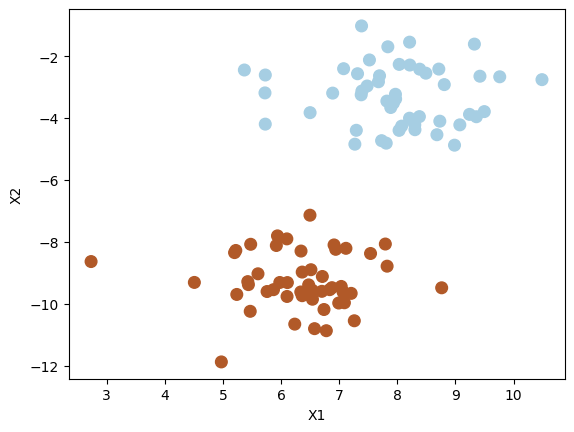

In [176]:
#Create the data
from sklearn.datasets import make_classification, make_blobs


X, y = make_blobs(n_samples=100, centers=2, random_state=6)

plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=plt.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2');

In [177]:
#Fit the SVM
from sklearn.svm import SVC

clf00 = SVC(kernel='linear',C= 10000)

clf00.fit(X,y)

SVC(C=10000, kernel='linear')

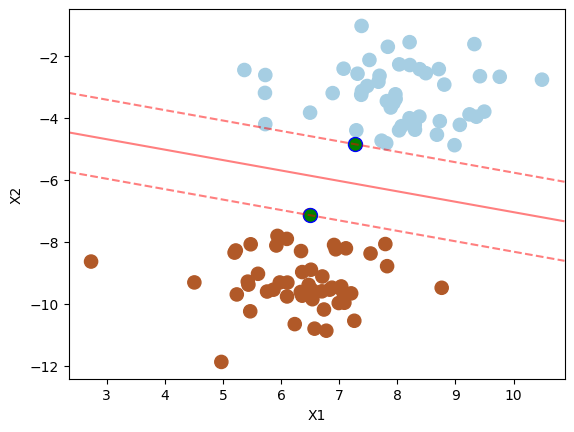

In [182]:
#Then we visualize it
plt.scatter(X[:, 0], X[:, 1], c=y, s=90, cmap=plt.cm.Paired)

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()


xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf00.decision_function(xy).reshape(XX.shape)

ax.contour(
    XX, YY, Z, colors="red", levels=[-1, 0, 1], alpha=0.5, linestyles=["--", "-", "--"]
)
 
ax.scatter(
    clf00.support_vectors_[:, 0],
    clf00.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="green",
    edgecolors="blue",
)

plt.xlabel('X1')
plt.ylabel('X2')

plt.show()

Support Vectors - Datapoints either side of the line seperating the two classes.
Hyperplane - The line seperating the two classes.

i.e. The support vectors are the points that the dotted lines strike through, while the hyperplane is the line inbetween the dotted lines.

## Problem 3: (10 marks)

In Lab Sheet 1 Problem 2 you predicted whether a given suburb has a crime rate above or below the median. 

In [ ]:
url_boston = 'https://github.com/JWarmenhoven/ISLR-python/raw/master/Notebooks/Data/Boston.csv'

Now try using a SVM and compare the performance with those you obtained in Lab sheet 1 and discuss. 

In [167]:
#Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report

In [168]:
#Import the data
df1 = pd.read_csv('https://github.com/JWarmenhoven/ISLR-python/raw/master/Notebooks/Data/Boston.csv')
df1

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [169]:
#Next calculate the median of the crime rate
median1 = df1['crim'].median()
median1

0.25651

In [170]:
##Then create the binary variable crim01
df1['crim01'] = df1['crim'].apply(lambda x: 1 if x > median else 0)

df1

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,crim01
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,0
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,0
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4,0
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6,0
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9,0
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0,0


In [171]:
#Define the X and y variables
X = df1.drop(columns = ['crim','crim01','zn', 'indus', 'chas', 'rm', 'age', 'dis', 'tax', 'ptratio',
 'black', 'lstat', 'medv'])

y = df1.crim01

In [172]:
#Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [173]:
#Select the optimal C parameter by cross-validation
tuned_parameters1 = [{'C': [0.001, 0.01, 0.1, 1, 5, 10, 100]}]
clf2 = GridSearchCV(SVC(kernel='linear'), tuned_parameters1, cv=10, scoring='accuracy', return_train_score=True)
clf2.fit(X_train, y_train)
clf2.cv_results_

{'mean_fit_time': array([0.00296459, 0.00273046, 0.00267286, 0.00328736, 0.00348971,
        0.00403781, 0.00363729]),
 'std_fit_time': array([0.00110902, 0.00023483, 0.0001854 , 0.00020085, 0.00030427,
        0.00112559, 0.00021382]),
 'mean_score_time': array([0.00188997, 0.00180912, 0.00171456, 0.00169213, 0.00190232,
        0.00195694, 0.00178516]),
 'std_score_time': array([4.91579269e-04, 1.06153098e-04, 1.02799622e-04, 6.90242210e-05,
        3.32732914e-04, 3.66895627e-04, 8.00925513e-05]),
 'param_C': masked_array(data=[0.001, 0.01, 0.1, 1, 5, 10, 100],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.001},
  {'C': 0.01},
  {'C': 0.1},
  {'C': 1},
  {'C': 5},
  {'C': 10},
  {'C': 100}],
 'split0_test_score': array([0.97560976, 0.97560976, 0.97560976, 0.97560976, 0.97560976,
        0.97560976, 0.97560976]),
 'split1_test_score': array([0.97560976, 0.97560976, 0.97560976, 0.97560976, 

In [174]:
# Print the best hyperparameters and their score
print("Best parameters: {}".format(clf2.best_params_))
print("Best cross-validation score: {:.2f}".format(clf2.best_score_))

Best parameters: {'C': 0.001}
Best cross-validation score: 0.97


In [175]:
#Now, we test the model on the test set
svm_best2 = clf2.best_estimator_
print("Test set score: {:.2f}".format(svm_best2.score(X_test, y_test)))

Test set score: 0.97


The results of the other models from the last task sheet on this data are 

LDA Model: 89.22%
QDA Model: 88.24%
Logistic Regression Model: 88.24%

The accuracy of this model using cross validation and svm is 97%

All the models seem to be good models, but the model we generated in this task sheet performs better on the data. One of the reasons this might be is because we used cross validation to split the data. Cross validation does a better job at splitting the data more accurately and optimally than the "train test split" function in python, which was utilized fro all the models in the first task sheet. 